In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [7]:
data=pd.read_table("data.txt",header=None,sep=",")

C:\Users\RANGA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [9]:
data.columns

Int64Index([0, 1, 2], dtype='int64')

In [11]:
x=data[[0,1]]
y=data[2]

In [14]:
admitted=data.loc[y==1]
admitted.head()

,0,1,2
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


In [16]:
not_adm=data.loc[y==0]
not_adm.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


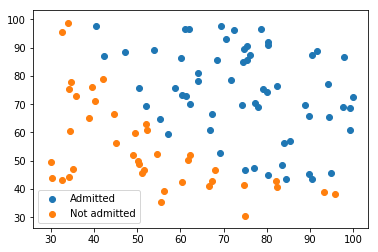

In [21]:
plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],label="Admitted")
plt.scatter(not_adm.iloc[:,0],not_adm.iloc[:,1],label="Not admitted")
plt.legend()
plt.show()

In [22]:
log=LogisticRegression()
log.fit(x,y)

C:\Users\RANGA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
pred=log.predict(x)

In [24]:
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
acc=accuracy_score(y,pred)
acc

0.87

In [27]:
conf=confusion_matrix(y,pred)
conf

array([[27, 13],
       [ 0, 60]], dtype=int64)

In [28]:
log.predict([[60,86]])

array([1], dtype=int64)

In [30]:
model=LogisticRegression(multi_class="multinomial",solver="lbfgs")
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
model.fit(x,y)
pred_val=model.predict(x)
accu=accuracy_score(y,pred_val)
confu=confusion_matrix(y,pred_val)
print("accuracy",accu)
print("confussion matrix\n",confu)
model.predict([[60,80]])

accuracy 0.89
confussion matrix
 [[34  6]
 [ 5 55]]


array([1], dtype=int64)